In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from tqdm.notebook import tqdm
import h5py
from os.path import basename

# load single image/bkgd

In [2]:
files = sorted(glob('../data/temperature_scans/x*'))
bkgd_files = sorted(glob('../data/temperature_scans/b*'))
files, bkgd_files

(['../data/temperature_scans\\xpcs_plan_0.h5',
  '../data/temperature_scans\\xpcs_plan_1.h5',
  '../data/temperature_scans\\xpcs_plan_2.h5',
  '../data/temperature_scans\\xpcs_plan_3.h5',
  '../data/temperature_scans\\xpcs_plan_4.h5',
  '../data/temperature_scans\\xpcs_plan_5.h5',
  '../data/temperature_scans\\xpcs_plan_6.h5',
  '../data/temperature_scans\\xpcs_plan_7.h5',
  '../data/temperature_scans\\xpcs_plan_8.h5',
  '../data/temperature_scans\\xpcs_plan_9.h5'],
 ['../data/temperature_scans\\bkgd_0.h5',
  '../data/temperature_scans\\bkgd_228K.h5',
  '../data/temperature_scans\\bkgd_237K.h5'])

In [3]:
file = bkgd_files[0]
with h5py.File(file, 'r') as f:
    bkgd = f['entry']['data']['data'][:]

bkgd = bkgd.mean(axis=0)
bkgd.shape

(960, 2050)

In [4]:
file = files[0]
with h5py.File(file, 'r') as f:
    img = f['entry']['data']['data'][0]

img.shape

(960, 2050)

In [5]:
img /= bkgd

C:\Users\rtumbleson\AppData\Local\Temp\ipykernel_17704\1719818965.py:1: RuntimeWarning: invalid value encountered in divide
  img /= bkgd


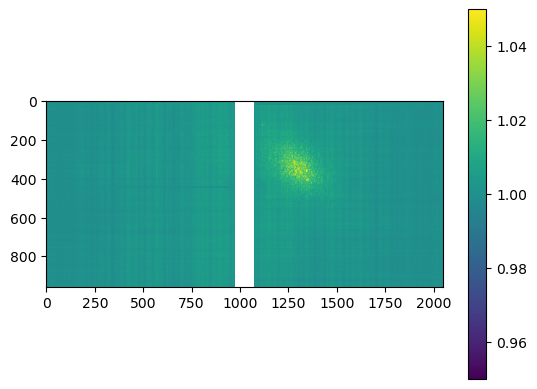

In [6]:
plt.figure()
plt.imshow(img, vmin=0.95, vmax=1.05)
plt.colorbar()
plt.show()

### ROI

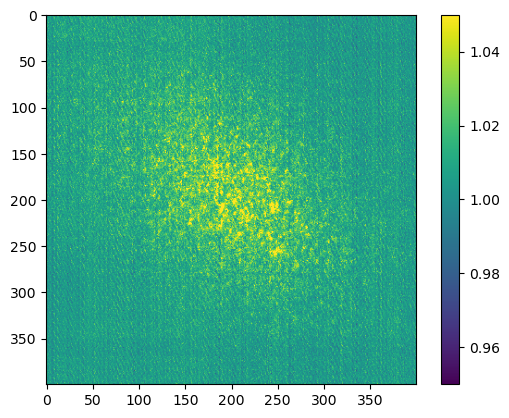

In [7]:
roi = np.s_[150:550, 1100:1500]

plt.figure()
plt.imshow(img[roi], vmin=0.95, vmax=1.05)
plt.colorbar()
plt.show()

# load data

In [25]:
file = files[0]
with h5py.File(file, 'r') as f:
    data = f['entry']['data']['data'][(..., *roi)]

data -= bkgd[roi]
data.shape

(1000, 400, 400)

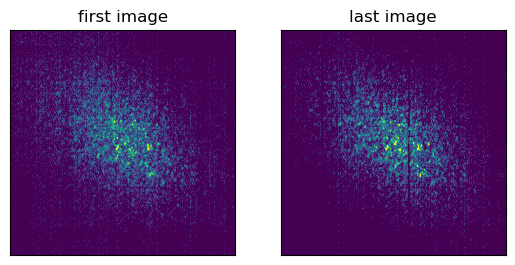

In [26]:
vmin = np.percentile(data[0], 50)
vmax = np.percentile(data[0], 99.9)

fig, ax = plt.subplots(ncols=2)
ax[0].imshow(data[0], vmin=vmin, vmax=vmax)
ax[1].imshow(data[-1], vmin=vmin, vmax=vmax)

ax[0].set_title('first image')
ax[1].set_title('last image')

for a in ax:
    a.set_xticks([])
    a.set_yticks([])
plt.show()

In [27]:
intensity = np.mean(data, axis=(1,2))

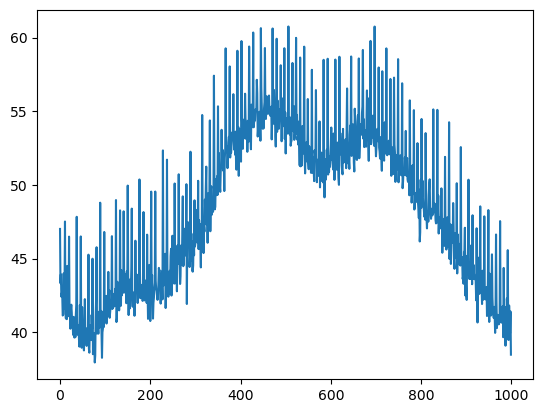

In [28]:
plt.plot(intensity)

# loop

In [4]:
roi = np.s_[150:550, 1100:1500]
intensity = []

for file in tqdm(files):
    with h5py.File(file, 'r') as f:
        data = f['entry']['data']['data'][(..., *roi)]
    data -= bkgd[roi]


    # Plot first and last image
    vmin = np.percentile(data[0], 50)
    vmax = np.percentile(data[0], 99.9)

    fig, ax = plt.subplots(ncols=2)
    ax[0].imshow(data[0], vmin=vmin, vmax=vmax)
    ax[1].imshow(data[-1], vmin=vmin, vmax=vmax)

    ax[0].set_title('first image')
    ax[1].set_title('last image')

    for a in ax:
        a.set_xticks([])
        a.set_yticks([])
    plt.suptitle(basename(file))
    plt.show()

intensity.append(np.sum(data, axis=(1,2)))

  0%|          | 0/10 [00:00<?, ?it/s]